# Training a model with a standalone image dataset in fastai
- Walkthrough of how to train a deep learning model in fastai with a standalone image dataset
- This notebbook assumes you have downloaded the dataset described here https://www.kaggle.com/moltean/fruits and followed the steps in the "Getting Ready" section of Chapter 6 section "Training a classification model with a standalone vision dataset" to make the dataset available in your Gradient environment


In [1]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [2]:
# set up the notebook for fast.ai
fastbook.setup_book()

In [32]:
modifier = 'may3'

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [5]:
# ingest the standalone image dataset fruits-360
path = URLs.path('fruits-360')

In [6]:
# examine the directory structure of the dataset
path.ls()

(#6) [Path('/storage/archive/fruits-360/Test'),Path('/storage/archive/fruits-360/papers'),Path('/storage/archive/fruits-360/LICENSE'),Path('/storage/archive/fruits-360/test-multiple_fruits'),Path('/storage/archive/fruits-360/Training'),Path('/storage/archive/fruits-360/readme.md')]

In [7]:
dls = ImageDataLoaders.from_folder(path, train='Training', valid='Test')

# Examine the dataset

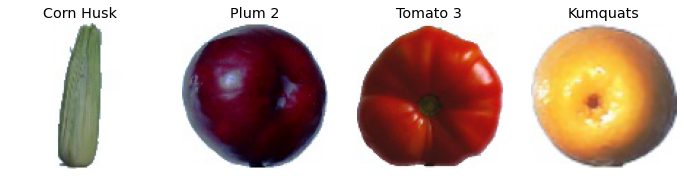

In [8]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [10]:
# examine the train subdirectory
(path/'Training').ls()

(#131) [Path('/storage/archive/fruits-360/Training/Pomegranate'),Path('/storage/archive/fruits-360/Training/Pepper Green'),Path('/storage/archive/fruits-360/Training/Apple Golden 2'),Path('/storage/archive/fruits-360/Training/Strawberry Wedge'),Path('/storage/archive/fruits-360/Training/Apple Crimson Snow'),Path('/storage/archive/fruits-360/Training/Granadilla'),Path('/storage/archive/fruits-360/Training/Quince'),Path('/storage/archive/fruits-360/Training/Tomato not Ripened'),Path('/storage/archive/fruits-360/Training/Peach'),Path('/storage/archive/fruits-360/Training/Apricot')...]

In [11]:
(path/'Training/Nectarine').ls()

(#492) [Path('/storage/archive/fruits-360/Training/Nectarine/r_247_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/288_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/305_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/0_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/317_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/r_317_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/r_253_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/r_204_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/r_201_100.jpg'),Path('/storage/archive/fruits-360/Training/Nectarine/146_100.jpg')...]

In [12]:
(path/'Training/Corn').ls()

(#450) [Path('/storage/archive/fruits-360/Training/Corn/r2_15_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/r2_150_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/0_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/94_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/89_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/r2_149_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/44_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/36_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/r_94_100.jpg'),Path('/storage/archive/fruits-360/Training/Corn/r2_134_100.jpg')...]

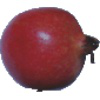

In [13]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

In [34]:
# display a thumbnail of the image
img.to_thumb(20)

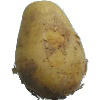

In [15]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [16]:
# define a cnn_learner object for the dataset
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [17]:
%%time
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.077759,1.049447,0.963946,01:31


epoch,train_loss,valid_loss,accuracy,time
0,0.913377,0.902737,0.991978,01:58
1,0.863309,0.864238,0.995769,01:58
2,0.841727,0.836321,0.997796,01:58
3,0.831393,0.830771,0.997444,01:58
4,0.829582,0.828693,0.997884,01:58


CPU times: user 10min 19s, sys: 49 s, total: 11min 8s
Wall time: 11min 23s


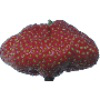

In [18]:
# take a look at one of the test images
img_test_files = get_image_files(path/"Test")
img2 = PILImage.create(img_test_files[700])
img2

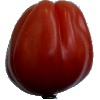

In [19]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [20]:
# apply the trained model to the image
learn.predict(img2)

('Strawberry Wedge',
 TensorImage(117),
 TensorImage([5.5287e-04, 5.8729e-04, 4.3915e-04, 7.1637e-04, 4.6952e-04, 5.7983e-04, 4.7180e-04, 5.9618e-04, 5.0780e-04, 4.0931e-04, 4.5940e-04, 7.0770e-04, 7.0809e-04, 6.5259e-04, 6.5978e-04, 5.3266e-04,
         7.2990e-04, 8.4665e-04, 3.6720e-04, 7.0212e-04, 8.6347e-04, 6.0037e-04, 7.3940e-04, 7.6813e-04, 6.0635e-04, 7.5843e-04, 7.1088e-04, 6.3793e-04, 7.8211e-04, 5.6861e-04, 6.8963e-04, 6.6847e-04,
         6.0576e-04, 6.2287e-04, 7.5428e-04, 9.0836e-04, 6.8213e-04, 7.9148e-04, 5.5145e-04, 5.9907e-04, 5.0626e-04, 5.7467e-04, 6.3718e-04, 6.5144e-04, 5.0754e-04, 8.1586e-04, 5.3653e-04, 6.4462e-04,
         6.2153e-04, 6.6965e-04, 7.3855e-04, 7.9604e-04, 5.8874e-04, 5.4711e-04, 5.7097e-04, 6.0761e-04, 5.8197e-04, 7.9834e-04, 7.2468e-04, 6.7074e-04, 4.2638e-04, 6.4700e-04, 7.2001e-04, 4.7989e-04,
         6.2428e-04, 5.0561e-04, 8.9213e-04, 6.2297e-04, 6.2638e-04, 6.8443e-04, 6.0546e-04, 7.3738e-04, 5.9545e-04, 5.4710e-04, 5.5876e-04, 5.5428e-04

In [21]:
# apply the trained model to the image
learn.predict(img3)

('Tomato Heart',
 TensorImage(125),
 TensorImage([5.6110e-04, 7.4122e-04, 6.6106e-04, 7.0526e-04, 8.3456e-04, 7.1830e-04, 4.7857e-04, 8.2510e-04, 7.0870e-04, 6.9801e-04, 6.7549e-04, 5.1823e-04, 7.5877e-04, 8.6114e-04, 6.3375e-04, 6.3768e-04,
         6.2907e-04, 7.3208e-04, 7.5443e-04, 6.9275e-04, 6.8134e-04, 5.4378e-04, 6.4222e-04, 6.1358e-04, 6.8001e-04, 6.4096e-04, 6.9659e-04, 8.1419e-04, 6.5037e-04, 8.4004e-04, 7.2150e-04, 6.6219e-04,
         9.5809e-04, 8.3602e-04, 7.3986e-04, 5.5498e-04, 6.7941e-04, 7.5781e-04, 5.0136e-04, 6.9421e-04, 7.4822e-04, 7.5638e-04, 6.0426e-04, 7.2764e-04, 8.8739e-04, 7.9243e-04, 5.5748e-04, 6.7485e-04,
         4.8520e-04, 6.9078e-04, 6.8147e-04, 6.5862e-04, 6.2541e-04, 6.0323e-04, 5.7093e-04, 6.2094e-04, 7.1028e-04, 6.9319e-04, 5.4292e-04, 7.9601e-04, 7.6126e-04, 7.2747e-04, 7.1577e-04, 7.7771e-04,
         5.9368e-04, 1.0395e-03, 7.4368e-04, 6.3575e-04, 6.7936e-04, 6.9432e-04, 7.1173e-04, 5.7752e-04, 1.0001e-03, 9.2254e-04, 1.0231e-03, 5.3364e-04, 7.

In [35]:
learn.path = Path('/notebooks/temp')
learn.export('fruits_360'+modifier+'.pkl')

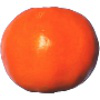

In [22]:
# select an image from the test set
img4 = PILImage.create(img_test_files[4000])
img4

In [23]:
learn.predict(img4)

('Clementine',
 TensorImage(33),
 TensorImage([6.8823e-04, 5.9452e-04, 6.2259e-04, 5.2093e-04, 7.4775e-04, 5.6328e-04, 4.8844e-04, 8.9067e-04, 5.5942e-04, 4.7983e-04, 6.7701e-04, 6.4831e-04, 4.1764e-04, 7.1269e-04, 6.2807e-04, 5.4727e-04,
         5.6331e-04, 7.8184e-04, 6.4914e-04, 6.1702e-04, 5.8009e-04, 4.9066e-04, 4.6483e-04, 7.3241e-04, 7.4508e-04, 5.8311e-04, 6.2620e-04, 1.0244e-03, 5.0523e-04, 4.5592e-04, 3.2788e-04, 5.5181e-04,
         5.4380e-04, 9.2268e-01, 6.4684e-04, 6.2856e-04, 6.6224e-04, 7.3674e-04, 5.8222e-04, 4.2390e-04, 4.3194e-04, 6.5047e-04, 4.6570e-04, 4.9551e-04, 7.5413e-04, 7.1295e-04, 5.2214e-04, 4.5522e-04,
         4.7590e-04, 5.1906e-04, 7.0006e-04, 5.1299e-04, 6.4422e-04, 7.1632e-04, 6.1915e-04, 7.3941e-04, 4.4225e-04, 6.9240e-04, 1.0086e-03, 3.9506e-04, 8.3733e-04, 6.0672e-04, 7.4236e-04, 6.1783e-04,
         5.2300e-04, 5.4667e-04, 5.2169e-04, 5.4883e-04, 4.7532e-04, 6.1730e-04, 4.6449e-04, 6.9257e-04, 3.9000e-04, 4.5262e-04, 4.8864e-04, 5.8648e-04, 6.102

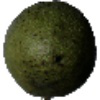

In [26]:
# take a look at a dog image from the training dataset
avocado_files = get_image_files(path/"Test/Avocado")
avocado_img = PILImage.create(avocado_files[30])
avocado_img

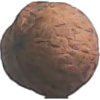

In [27]:
# take a look at a cat image from the training dataset
walnut_files = get_image_files(path/"Test/Walnut")
walnut_img = PILImage.create(walnut_files[30])
walnut_img

In [28]:
learn.predict(avocado_img)

('Avocado',
 TensorImage(14),
 TensorImage([3.9023e-04, 5.9015e-04, 5.2299e-04, 3.0475e-04, 5.7779e-04, 5.7201e-04, 2.0197e-04, 3.0211e-04, 5.0107e-04, 4.0196e-04, 5.1762e-04, 4.1946e-04, 3.3804e-04, 4.1061e-04, 9.3671e-01, 4.2566e-04,
         5.0626e-04, 5.1960e-04, 4.8361e-04, 4.6200e-04, 5.0016e-04, 3.9722e-04, 3.0203e-04, 5.4041e-04, 4.3439e-04, 5.5639e-04, 5.4460e-04, 4.9722e-04, 3.4571e-04, 4.7091e-04, 3.5859e-04, 5.6676e-04,
         5.3896e-04, 5.7201e-04, 7.3873e-04, 2.9858e-04, 3.9937e-04, 3.8848e-04, 5.1043e-04, 5.4287e-04, 5.5927e-04, 5.1005e-04, 4.3452e-04, 4.8029e-04, 5.6487e-04, 4.0782e-04, 3.7398e-04, 4.4078e-04,
         4.4194e-04, 6.0703e-04, 5.5859e-04, 3.9277e-04, 5.4818e-04, 5.0816e-04, 4.8134e-04, 5.8765e-04, 4.3756e-04, 3.7177e-04, 4.5130e-04, 6.5306e-04, 4.7650e-04, 7.4166e-04, 5.3843e-04, 3.6055e-04,
         5.1220e-04, 4.0618e-04, 3.5998e-04, 4.9659e-04, 7.1134e-04, 6.4496e-04, 3.9880e-04, 3.6079e-04, 5.4136e-04, 6.8846e-04, 5.4440e-04, 5.6530e-04, 5.4586e-

In [29]:
learn.predict(walnut_img)

('Walnut',
 TensorImage(129),
 TensorImage([5.0013e-04, 5.8467e-04, 7.0452e-04, 6.0763e-04, 5.5167e-04, 6.7749e-04, 6.8619e-04, 5.1028e-04, 5.7429e-04, 5.2902e-04, 5.2863e-04, 6.0057e-04, 5.1680e-04, 5.1235e-04, 5.7513e-04, 5.0199e-04,
         6.1083e-04, 6.2190e-04, 6.0553e-04, 7.0514e-04, 5.3982e-04, 4.6631e-04, 4.9104e-04, 7.3324e-04, 6.3145e-04, 6.8161e-04, 5.5360e-04, 5.1731e-04, 6.0942e-04, 5.5742e-04, 6.3422e-04, 6.3248e-04,
         5.1715e-04, 5.9454e-04, 6.5074e-04, 4.4216e-04, 5.8860e-04, 6.0122e-04, 6.4125e-04, 5.6648e-04, 4.5822e-04, 6.1421e-04, 5.2089e-04, 5.8130e-04, 5.6028e-04, 6.7495e-04, 4.9246e-04, 4.8495e-04,
         6.5103e-04, 6.2217e-04, 5.3554e-04, 6.1928e-04, 6.9799e-04, 8.1177e-04, 5.2141e-04, 7.4727e-04, 6.9618e-04, 6.2065e-04, 6.5892e-04, 6.0229e-04, 6.7863e-04, 4.3354e-04, 5.3899e-04, 4.6352e-04,
         6.7922e-04, 5.6060e-04, 6.1658e-04, 6.1120e-04, 5.5102e-04, 6.2588e-04, 5.0936e-04, 5.3076e-04, 5.7705e-04, 6.3393e-04, 6.8977e-04, 5.1729e-04, 5.5937e-

In [33]:
learn.save("fruits_model"+modifier)

Path('/storage/archive/fruits-360/models/fruits_modelmay3.pth')